In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

- https://github.com/gabrielelanaro/pyquante/blob/master/Data/lebedev_write.py
- https://people.sc.fsu.edu/~jburkardt/f_src/sphere_lebedev_rule/sphere_lebedev_rule.html
- http://stackoverflow.com/questions/5408276/python-uniform-spherical-distribution
- https://github.com/rasbt/matplotlib-gallery#3d-plots
- http://stackoverflow.com/questions/31768031/plotting-points-on-the-surface-of-a-sphere-in-pythons-matplotlib
- https://github.com/gabrielelanaro/pyquante/blob/master/Data/lebedev_write.py
- http://stackoverflow.com/a/26127012/1094316
- http://www.openprocessing.org/sketch/41142

## Fibonacci spheres

import math, random

def fibonacci_sphere(samples=1,randomize=True):
    rnd = 1.
    if randomize:
        rnd = random.random() * samples

    points = []
    offset = 2./samples
    increment = math.pi * (3. - math.sqrt(5.));

    for i in range(samples):
        y = ((i * offset) - 1) + (offset / 2);
        r = math.sqrt(1 - pow(y,2))

        phi = ((i + rnd) % samples) * increment

        x = math.cos(phi) * r
        z = math.sin(phi) * r

        points.append([x,y,z])

    return points

### Plot sphere

In [4]:
def plot_sphere(xx, yy, zz):
    # Create a sphere
    r = 1
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
    x = r*sin(phi)*cos(theta)
    y = r*sin(phi)*sin(theta)
    z = r*cos(phi)
    
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(
        x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

    ax.scatter(xx,yy,zz,color="k",s=20)

    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_aspect("equal")
    plt.tight_layout()

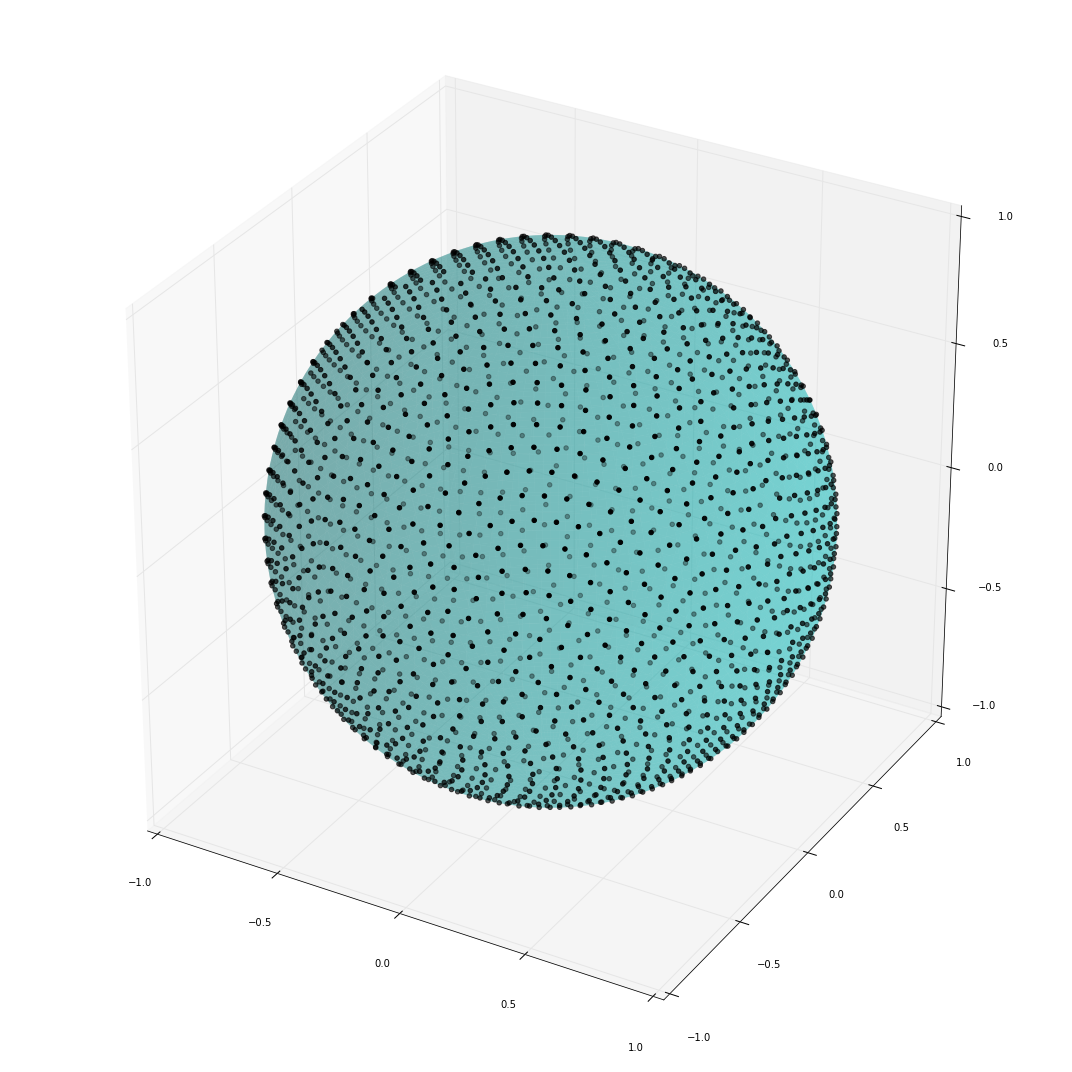

In [7]:
x, y, z = zip(*fibonacci_sphere(2048))
plot_sphere(x, y, z)

### Lebedev Rule

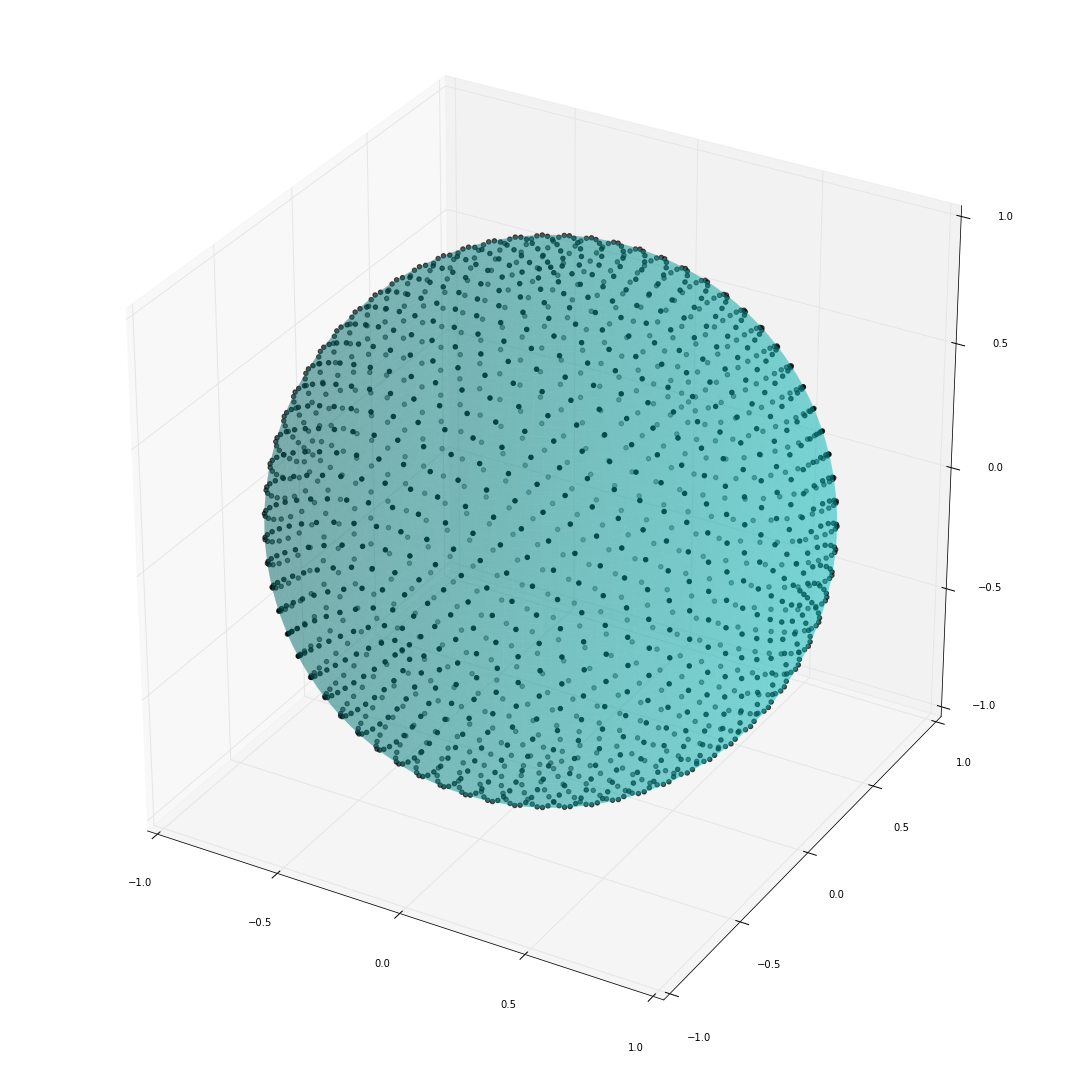

In [10]:
#Import data
data = np.genfromtxt('leb.txt')
theta, phi, r = np.hsplit(data, 3) 
theta = theta * np.pi / 180.0
phi = phi * np.pi / 180.0
xx = np.sin(phi)*np.cos(theta)
yy = np.sin(phi)*np.sin(theta)
zz = np.cos(phi)

plot_sphere(xx, yy, zz)